In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_1samp, shapiro
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import recall_score, make_scorer, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG, display
# import shap

import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
# from pycaret.classification import *
import lightgbm as lgb
from sklearn.metrics import recall_score

In [ ]:
df = pd.read_csv('/content/sample_data/Best_dataset_fp.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
X = df.drop(['TenYearCHD'], axis = 1)
y = df['TenYearCHD']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Train the LightGBM model
model = lgb.LGBMClassifier(metric='recall')
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Set the probability threshold
threshold = 0.02

# Convert probabilities to binary predictions based on the threshold
y_pred = (y_pred_prob >= threshold).astype(int)

# Calculate recall
recall = recall_score(y_test, y_pred)

print("Recall:", recall)

Recall: 0.9038461538461539


In [ ]:

# Assuming you have already trained your model and obtained the predictions
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[545  21]
 [ 94  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       566
           1       0.32      0.10      0.15       104

    accuracy                           0.83       670
   macro avg       0.59      0.53      0.53       670
weighted avg       0.77      0.83      0.79       670



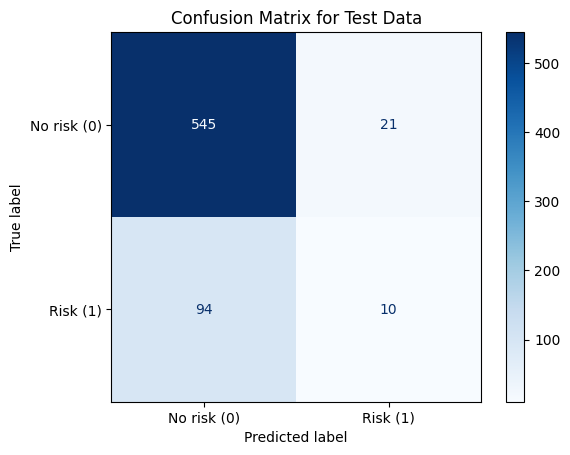

In [ ]:
def confusion_plot(cm):
  '''Plots the Confusion Matrix given as input'''
  cmd = ConfusionMatrixDisplay(cm, display_labels = ['No risk (0)', 'Risk (1)'])
  cmd.plot(cmap = 'Blues')
  plt.title('Confusion Matrix for Test Data')
  plt.show()

confusion_plot(confusion_matrix(y_test, y_pred))

In [ ]:
np.linspace(0.01, 0.1, 20)

array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ])